In [5]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.integrate import solve_bvp

## General class
Here we make a class that accepts a function that represents the differential equation in terms of the state and costate.
We also pass in a value for the optimal control.


In [32]:
class Control_Solver_Plotter:
    def __init__(self):
        self.t = None
        self.x = None
        self.u = None
        self.ode = None
        self.u_func = None
        self.bc = None

    def define_evolution(self,ode,bc):
        self.ode = ode
        self.bc = bc
        return self

    def define_control_function(self,u_func):
        self.u_func = u_func
        return self

    def solve_problem(self, t0, tf=None, n_points=100, x_guess=None):
        param = False
        if tf is None:
            tf = 1
            param = True
        
        self.t = np.linspace(t0, tf, n_points + 1)
        
        # Initialize x_guess if not provided
        if x_guess is None:
            x_guess = np.ones((2,n_points + 1))
        
        # Solve the boundary value problem
        if param:
            param_guess = np.array([1])  # Example parameter guess
            sol = solve_bvp(self.ode, self.bc, self.t, x_guess, param_guess)
        else:
            sol = solve_bvp(self.ode, self.bc, self.t, x_guess)
        
        # Assign solution to class attributes
        self.t = sol.x
        self.x = sol.y
        self.u = self.u_func(self.t,sol.y)
        
        return self


    def plot_solution(self,subplot = None,labels =["Polution"]):
        if subplot is not None:
            if type(subplot) is int:
                plt.subplot(subplot)
            else:
                plt.subplot(*subplot)
        for i,label in enumerate(labels):
            plt.plot(self.t,self.x[i],'k',label = label)
        plt.plot(self.t,self.u,'g',label = "Tax")

        plt.legend()

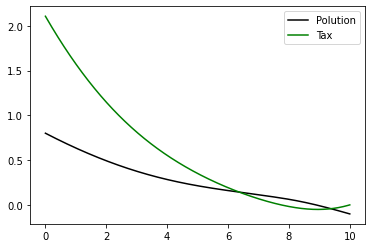

In [43]:
alpha = 1
beta = .1
n0 = .8
t0 = 0
tf = 10

def u_func(t,x):
    return -0.5/alpha*x[1]
def ode(t,x):
    return np.array([2 - u_func(t,x[1]) - beta*x[0],2*x[0]+beta * x[1]])
def bc(ya,yb):
    return np.array([ya[0]-n0,yb[1]])

plotter = Control_Solver_Plotter().define_control_function(u_func).define_evolution(ode,bc)

plotter.solve_problem(t0,tf)


plotter.plot_solution()

